# PCOS Prediction Model

## Importing libraries and reading dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
#accessing data
df = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
df.head().T

0          1          2          3          4
Sl. No                         1          2          3          4          5
Patient File No.               1          2          3          4          5
PCOS (Y/N)                     0          0          1          0          0
 Age (yrs)                    28         36         33         37         25
Weight (Kg)                 44.6       65.0       68.8       65.0       52.0
Height(Cm)                 152.0      161.5      165.0      148.0      161.0
BMI                         19.3  24.921163  25.270891  29.674945  20.060954
Blood Group                   15         15         11         13         11
Pulse rate(bpm)               78         74         72         72         72
RR (breaths/min)              22         20         18         20         18
Hb(g/dl)                   10.48       11.7       11.8       12.0       10.0
Cycle(R/I)                     2          2          2          2          2
Cycle length(days)             5          5          5          5          5
Marraige Status (Yrs)        7.0       11.0       10.0        4.0        1.0
Pregnant(Y/N)                  0          1          1          0          1
No. of aborptions              0          0          0          0          0
  I   beta-HCG(mIU/mL)      1.99       60.8     494.08       1.99     801.45
II    beta-HCG(mIU/mL)      1.99       1.99     494.08       1.99     801.45
FSH(mIU/mL)                 7.95       6.73       5.54       8.06       3.98
LH(mIU/mL)                  3.68       1.09       0.88       2.36        0.9
FSH/LH                  2.160326   6.174312   6.295455   3.415254   4.422222
Hip(inch)                     36         38         40         42         37
Waist(inch)                   30         32         36         36         30
Waist:Hip Ratio         0.833333   0.842105        0.9   0.857143   0.810811
TSH (mIU/L)                 0.68       3.16       2.54      16.41       3.57
AMH(ng/mL)                  2.07       1.53       6.63       1.22       2.26
PRL(ng/mL)                 45.16      20.09      10.52       36.9      30.09
Vit D3 (ng/mL)              17.1       61.3       49.7       33.4       43.8
PRG(ng/mL)                  0.57       0.97       0.36       0.36       0.38
RBS(mg/dl)                  92.0       92.0       84.0       76.0       84.0
Weight gain(Y/N)               0          0          0          0          0
hair growth(Y/N)               0          0          0          0          0
Skin darkening (Y/N)           0          0          0          0          0
Hair loss(Y/N)                 0          0          1          0          1
Pimples(Y/N)                   0          0          1          0          0
Fast food (Y/N)              1.0        0.0        1.0        0.0        0.0
Reg.Exercise(Y/N)              0          0          0          0          0
BP _Systolic (mmHg)          110        120        120        120        120
BP _Diastolic (mmHg)          80         70         80         70         80
Follicle No. (L)               3          3         13          2          3
Follicle No. (R)               3          5         15          2          4
Avg. F size (L) (mm)        18.0       15.0       18.0       15.0       16.0
Avg. F size (R) (mm)        18.0       14.0       20.0       14.0       14.0
Endometrium (mm)             8.5        3.7       10.0        7.5        7.0
Unnamed: 44                  NaN        NaN        NaN        NaN        NaN

## Data Cleaning

In [3]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [4]:
#removing space from column names and unnecessary columns
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df = df.drop(['Sl._No','Patient_File_No.','Blood_Group','Pulse_rate(bpm)','RR_(breaths/min)','Hb(g/dl)','Marraige_Status_(Yrs)','Pregnant(Y/N)','No._of_aborptions','I___beta-HCG(mIU/mL)','II____beta-HCG(mIU/mL)'], axis=1)
df = df.drop(df.columns[-1], axis = 1)
df.head().T

0          1          2          3          4
PCOS_(Y/N)                   0          0          1          0          0
Age_(yrs)                   28         36         33         37         25
Weight_(Kg)               44.6       65.0       68.8       65.0       52.0
Height(Cm)               152.0      161.5      165.0      148.0      161.0
BMI                       19.3  24.921163  25.270891  29.674945  20.060954
Cycle(R/I)                   2          2          2          2          2
Cycle_length(days)           5          5          5          5          5
FSH(mIU/mL)               7.95       6.73       5.54       8.06       3.98
LH(mIU/mL)                3.68       1.09       0.88       2.36        0.9
FSH/LH                2.160326   6.174312   6.295455   3.415254   4.422222
Hip(inch)                   36         38         40         42         37
Waist(inch)                 30         32         36         36         30
Waist:Hip_Ratio       0.833333   0.842105        0.9   0.857143   0.810811
TSH_(mIU/L)               0.68       3.16       2.54      16.41       3.57
AMH(ng/mL)                2.07       1.53       6.63       1.22       2.26
PRL(ng/mL)               45.16      20.09      10.52       36.9      30.09
Vit_D3_(ng/mL)            17.1       61.3       49.7       33.4       43.8
PRG(ng/mL)                0.57       0.97       0.36       0.36       0.38
RBS(mg/dl)                92.0       92.0       84.0       76.0       84.0
Weight_gain(Y/N)             0          0          0          0          0
hair_growth(Y/N)             0          0          0          0          0
Skin_darkening_(Y/N)         0          0          0          0          0
Hair_loss(Y/N)               0          0          1          0          1
Pimples(Y/N)                 0          0          1          0          0
Fast_food_(Y/N)            1.0        0.0        1.0        0.0        0.0
Reg.Exercise(Y/N)            0          0          0          0          0
BP__Systolic_(mmHg)        110        120        120        120        120
BP__Diastolic_(mmHg)        80         70         80         70         80
Follicle_No._(L)             3          3         13          2          3
Follicle_No._(R)             3          5         15          2          4
Avg._F_size_(L)_(mm)      18.0       15.0       18.0       15.0       16.0
Avg._F_size_(R)_(mm)      18.0       14.0       20.0       14.0       14.0
Endometrium_(mm)           8.5        3.7       10.0        7.5        7.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS_(Y/N)            541 non-null    int64  
 1   Age_(yrs)             541 non-null    int64  
 2   Weight_(Kg)           541 non-null    float64
 3   Height(Cm)            541 non-null    float64
 4   BMI                   541 non-null    float64
 5   Cycle(R/I)            541 non-null    int64  
 6   Cycle_length(days)    541 non-null    int64  
 7   FSH(mIU/mL)           541 non-null    float64
 8   LH(mIU/mL)            541 non-null    float64
 9   FSH/LH                541 non-null    float64
 10  Hip(inch)             541 non-null    int64  
 11  Waist(inch)           541 non-null    int64  
 12  Waist:Hip_Ratio       541 non-null    float64
 13  TSH_(mIU/L)           541 non-null    float64
 14  AMH(ng/mL)            541 non-null    object 
 15  PRL(ng/mL)            5

In [6]:
df.nunique()

PCOS_(Y/N)                2
Age_(yrs)                29
Weight_(Kg)             117
Height(Cm)               50
BMI                     355
Cycle(R/I)                3
Cycle_length(days)       12
FSH(mIU/mL)             371
LH(mIU/mL)              342
FSH/LH                  512
Hip(inch)                19
Waist(inch)              23
Waist:Hip_Ratio          96
TSH_(mIU/L)             308
AMH(ng/mL)              301
PRL(ng/mL)              481
Vit_D3_(ng/mL)          331
PRG(ng/mL)               89
RBS(mg/dl)               55
Weight_gain(Y/N)          2
hair_growth(Y/N)          2
Skin_darkening_(Y/N)      2
Hair_loss(Y/N)            2
Pimples(Y/N)              2
Fast_food_(Y/N)           2
Reg.Exercise(Y/N)         2
BP__Systolic_(mmHg)       6
BP__Diastolic_(mmHg)      5
Follicle_No._(L)         21
Follicle_No._(R)         20
Avg._F_size_(L)_(mm)     31
Avg._F_size_(R)_(mm)     32
Endometrium_(mm)         91
dtype: int64

In [7]:
df['Cycle(R/I)'].unique()

array([2, 4, 5], dtype=int64)

In [8]:
#changing data type of object type variables
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].replace('a',df['AMH(ng/mL)'].value_counts().idxmax())
df['Cycle(R/I)'] = df['Cycle(R/I)'].replace(5,4)
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype(float)


In [9]:
#filling missing values with mean and median of the column
df['Fast_food_(Y/N)'] = df['Fast_food_(Y/N)'].fillna(value =  df['Fast_food_(Y/N)'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PCOS_(Y/N)            541 non-null    int64  
 1   Age_(yrs)             541 non-null    int64  
 2   Weight_(Kg)           541 non-null    float64
 3   Height(Cm)            541 non-null    float64
 4   BMI                   541 non-null    float64
 5   Cycle(R/I)            541 non-null    int64  
 6   Cycle_length(days)    541 non-null    int64  
 7   FSH(mIU/mL)           541 non-null    float64
 8   LH(mIU/mL)            541 non-null    float64
 9   FSH/LH                541 non-null    float64
 10  Hip(inch)             541 non-null    int64  
 11  Waist(inch)           541 non-null    int64  
 12  Waist:Hip_Ratio       541 non-null    float64
 13  TSH_(mIU/L)           541 non-null    float64
 14  AMH(ng/mL)            541 non-null    float64
 15  PRL(ng/mL)            5

In [10]:
df.describe().T.style.background_gradient(cmap='Reds')

## Data Features

PCOS (Y/N): This variable represents the target variable or outcome of the model, which is whether a patient has PCOS or   not. It is a binary variable, with "Y" indicating that the patient has PCOS and "N" indicating that the patient does not have PCOS.

Age (yrs): This variable represents the age of the patient in years at the time of the study. Age is an important predictor of PCOS and is known to affect the likelihood of developing the condition.

Weight (Kg): This variable represents the weight of the patient in kilograms at the time of the study. Weight is an important predictor of PCOS, as obesity is known to be a risk factor for the condition.

Height(Cm): This variable represents the height of the patient in centimeters at the time of the study. Height is used to calculate the Body Mass Index (BMI) of the patient.

BMI: This variable represents the Body Mass Index (BMI) of the patient, which is calculated as the weight in kilograms divided by the height in meters squared. BMI is a measure of body fatness and is used to assess the risk of developing PCOS.

Cycle(R/I): This variable represents the type of menstrual cycle of the patient, which can be regular (R) or irregular (I). It is an important predictor of PCOS, as irregular menstrual cycles are a hallmark of the condition.

Cycle length(days): This variable represents the length of the menstrual cycle in days for the patient. It is an important predictor of PCOS, as longer or shorter menstrual cycles are associated with the condition.

FSH(mIU/mL): Follicle-stimulating hormone (FSH) is a hormone produced by the pituitary gland that regulates the menstrual cycle and the development and maturation of eggs in the ovaries.

LH(mIU/mL): Luteinizing hormone (LH) is another hormone produced by the pituitary gland that regulates the menstrual cycle and triggers ovulation.

FSH/LH: The ratio of FSH to LH levels can help diagnose PCOS, as women with PCOS often have a higher ratio than normal.

Hip(inch): Measurement of the circumference of the hips in inches.

Waist(inch): Measurement of the circumference of the waist in inches.

Waist:Hip Ratio: The ratio of waist circumference to hip circumference is used as an indicator of health risks associated with excess abdominal fat. A higher waist-to-hip ratio indicates more abdominal fat.

TSH (mIU/L): Thyroid-stimulating hormone (TSH) is produced by the pituitary gland and regulates the production of thyroid hormones. Abnormal TSH levels can indicate thyroid disorders, which are commonly associated with PCOS.

AMH(ng/mL): Anti-Mullerian Hormone (AMH) is a hormone produced by the ovaries that can help determine the number of eggs remaining in the ovaries. High levels of AMH can indicate PCOS.

PRL(ng/mL): Prolactin is a hormone produced by the pituitary gland that stimulates milk production in breastfeeding women. High levels of prolactin can affect ovulation and menstrual cycles, and are associated with PCOS.

Vit D3 (ng/mL): Vitamin D is important for bone health and immune system function. Low levels of vitamin D have been associated with insulin resistance, which is common in women with PCOS.

PRG(ng/mL): Progesterone is a hormone produced by the ovaries that helps regulate the menstrual cycle and prepares the uterus for pregnancy. Low levels of progesterone are associated with irregular menstrual cycles, which are common in women with PCOS.

RBS(mg/dl): Random blood sugar (RBS) is a measure of glucose levels in the blood. High levels of glucose can indicate insulin resistance, which is commonly associated with PCOS.

Weight gain(Y/N): A binary variable indicating whether the patient has experienced weight gain or not.

hair growth(Y/N): A binary variable indicating whether the patient has experienced excessive hair growth or not.

Skin darkening (Y/N): A binary variable indicating whether the patient has experienced skin darkening or not.

Hair loss(Y/N): A binary variable indicating whether the patient has experienced hair loss or not.

Pimples(Y/N): A binary variable indicating whether the patient has experienced pimples or not.

Fast food (Y/N): A binary variable indicating whether the patient frequently consumes fast food or not.

Reg.Exercise(Y/N): A binary variable indicating whether the patient engages in regular exercise or not.

BP _Systolic (mmHg): Systolic blood pressure is the pressure in the arteries when the heart beats.

BP _Diastolic (mmHg): Diastolic blood pressure is the pressure in the arteries when the heart is at rest between beats.

Follicle No. (L): The number of follicles (fluid-filled sacs in the ovaries that contain eggs) on the left ovary.

Follicle No. (R): The number of follicles on the right ovary.

Avg. F size (L) (mm): The average size of follicles on the left ovary in millimeters.

Avg. F size (R) (mm): The average size of follicles on the right ovary in millimeters.

Endometrium (mm): The thickness of the endometrial lining in the uterus is an important indicator of the menstrual cycle and reproductive health in females.





## Exploratory Data Analysis (EDA)

In [11]:
df['PCOS_(Y/N)'].value_counts()

0    364
1    177
Name: PCOS_(Y/N), dtype: int64

Text(0.5, 1.0, 'The number of females having PCOS to not having PCOS')

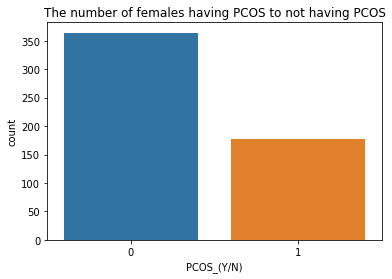

In [12]:
sns.countplot(data = df,x='PCOS_(Y/N)')
plt.title('The number of females having PCOS to not having PCOS')

In [13]:
df.groupby(['Cycle(R/I)','PCOS_(Y/N)'])['PCOS_(Y/N)'].count()

Cycle(R/I)  PCOS_(Y/N)
2           0             308
            1              82
4           0              56
            1              95
Name: PCOS_(Y/N), dtype: int64

In [14]:
px.histogram(df,x='Cycle(R/I)',color='PCOS_(Y/N)',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='Distribution of regular and irregular cycle')


Based on the given data, it appears that there is a relationship between the menstrual cycle and the presence or absence of PCOS.

Specifically, for cases with regular periods, there are 308 occurrences without PCOS and 82 occurrences with PCOS. On the other hand, for cases with irregular periods, there are 56 occurrences without PCOS and 95 occurrences with PCOS.

This shows that irregular menstrual cycles may be associated with a higher likelihood of PCOS, while regular menstrual cycles may be associated with a lower likelihood of PCOS.



In [15]:
px.histogram(df,x='Reg.Exercise(Y/N)',color='PCOS_(Y/N)',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='The effect of the Regular Excercise on PCOS ')



This shows that females with regular excercise have low risk of developing PCOS.

<AxesSubplot:ylabel='Density'>

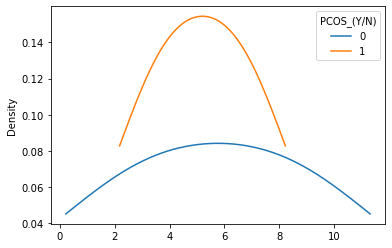

In [16]:
df.pivot_table(index='Cycle(R/I)',columns='PCOS_(Y/N)',values='FSH/LH',aggfunc='mean').plot(kind="kde")


This shows that the ratio FSH/LH is generally higher for females having PCOS.

Text(0.5, 1.0, 'Distribution of BMI achieved by PCOS')

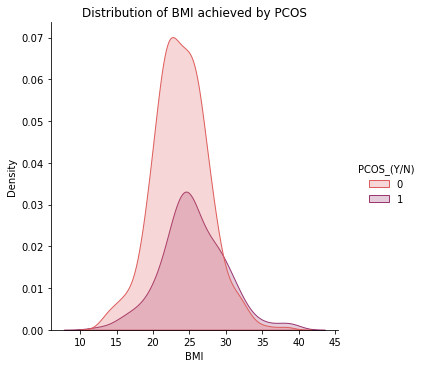

In [17]:
#Distribution of BMI
sns.displot(data=df,x='BMI',hue='PCOS_(Y/N)',palette='flare',kind='kde',fill=True)
plt.title('Distribution of BMI achieved by PCOS')


In [18]:
#Distribution of LH
fig = px.violin(df,x='PCOS_(Y/N)',y='LH(mIU/mL)',color='PCOS_(Y/N)',points='all',box=True,template='plotly_dark',title='Distribution of LH by PCOS',color_discrete_sequence=['#71AEC2 ','#D58989'])
fig.update_yaxes(range=[-50, 50])  # Set the minimum and maximum values of the y-axis
fig.show()

In [19]:
#Distribution of FSH
fig = px.violin(df,x='PCOS_(Y/N)',y='FSH(mIU/mL)',color='PCOS_(Y/N)',points='all',box=True,template='plotly_dark',title='Distribution of LH by PCOS',color_discrete_sequence=['#71AEC2 ','#D58989'])
fig.update_yaxes(range=[-100, 100])  # Set the minimum and maximum values of the y-axis
fig.show()

In [20]:
df.groupby(['Cycle_length(days)','PCOS_(Y/N)'])['PCOS_(Y/N)'].count()


Cycle_length(days)  PCOS_(Y/N)
0                   0               1
2                   0              11
                    1              27
3                   0              18
                    1              18
4                   0              24
                    1              37
5                   0             213
                    1              63
6                   0              80
                    1              11
7                   0               6
                    1              13
8                   0               1
                    1               1
9                   0               6
                    1               3
10                  1               1
11                  0               3
                    1               2
12                  0               1
                    1               1
Name: PCOS_(Y/N), dtype: int64

In [21]:
fig=px.pie(df,values='PCOS_(Y/N)',names='Cycle_length(days)',hole=.4,template='plotly_dark',color_discrete_sequence=px.colors.sequential.RdBu,title='The effect of PCOS on cycle length')
fig.update_traces(textposition='inside',textinfo='percent+label')


This shows that the average length of menstrual cycle for a female having PCOS is 4-5 days.

In [22]:
df.groupby(['Weight_gain(Y/N)','PCOS_(Y/N)'])['PCOS_(Y/N)'].value_counts()

Weight_gain(Y/N)  PCOS_(Y/N)  PCOS_(Y/N)
0                 0           0             281
                  1           1              56
1                 0           0              83
                  1           1             121
Name: PCOS_(Y/N), dtype: int64

In [23]:
px.histogram(df,x='Weight_gain(Y/N)',color='PCOS_(Y/N)',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='The effect of PCOS on pimples')


In [24]:
df.groupby(['hair_growth(Y/N)','PCOS_(Y/N)'])['PCOS_(Y/N)'].value_counts()

hair_growth(Y/N)  PCOS_(Y/N)  PCOS_(Y/N)
0                 0           0             317
                  1           1              76
1                 0           0              47
                  1           1             101
Name: PCOS_(Y/N), dtype: int64

In [25]:
px.histogram(df,x='hair_growth(Y/N)',color='PCOS_(Y/N)',template='plotly_dark',barmode='group',color_discrete_sequence=['#71AEC2 ','#D58989'],title='The effect of PCOS on pimples')


This shows that women having PCOS have high risk of gaining weight and growth of body hairs.

Text(0.5, 1.0, 'Distribution of BMI achieved by PCOS')

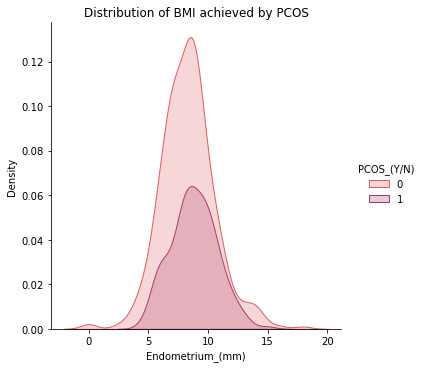

In [26]:
sns.displot(data=df,x='Endometrium_(mm)',hue='PCOS_(Y/N)',palette='flare',kind='kde',fill=True)
plt.title('Distribution of BMI achieved by PCOS')


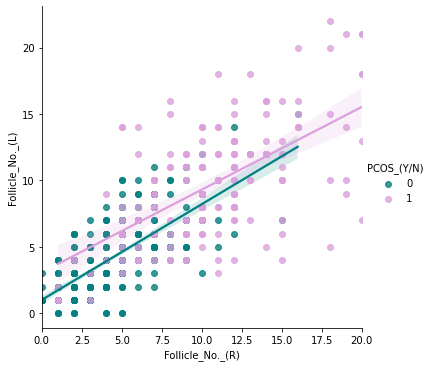

In [27]:
# Distribution of follicles in both ovaries.
color = ["teal", "plum"]
sns.lmplot(data =df,x='Follicle_No._(R)',y='Follicle_No._(L)', hue="PCOS_(Y/N)",palette=color)
plt.show()


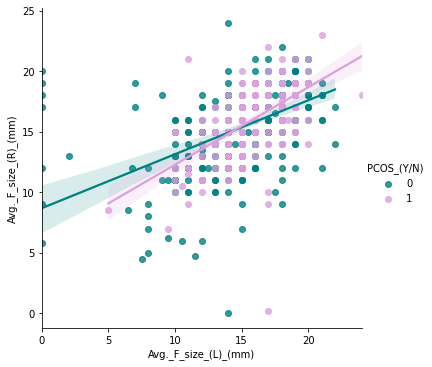

In [28]:
sns.lmplot(data =df,x='Avg._F_size_(L)_(mm)',y='Avg._F_size_(R)_(mm)', hue="PCOS_(Y/N)",palette=color)
plt.show()


In [29]:
X = df.drop(['PCOS_(Y/N)'], axis=1)
Y =df['PCOS_(Y/N)']

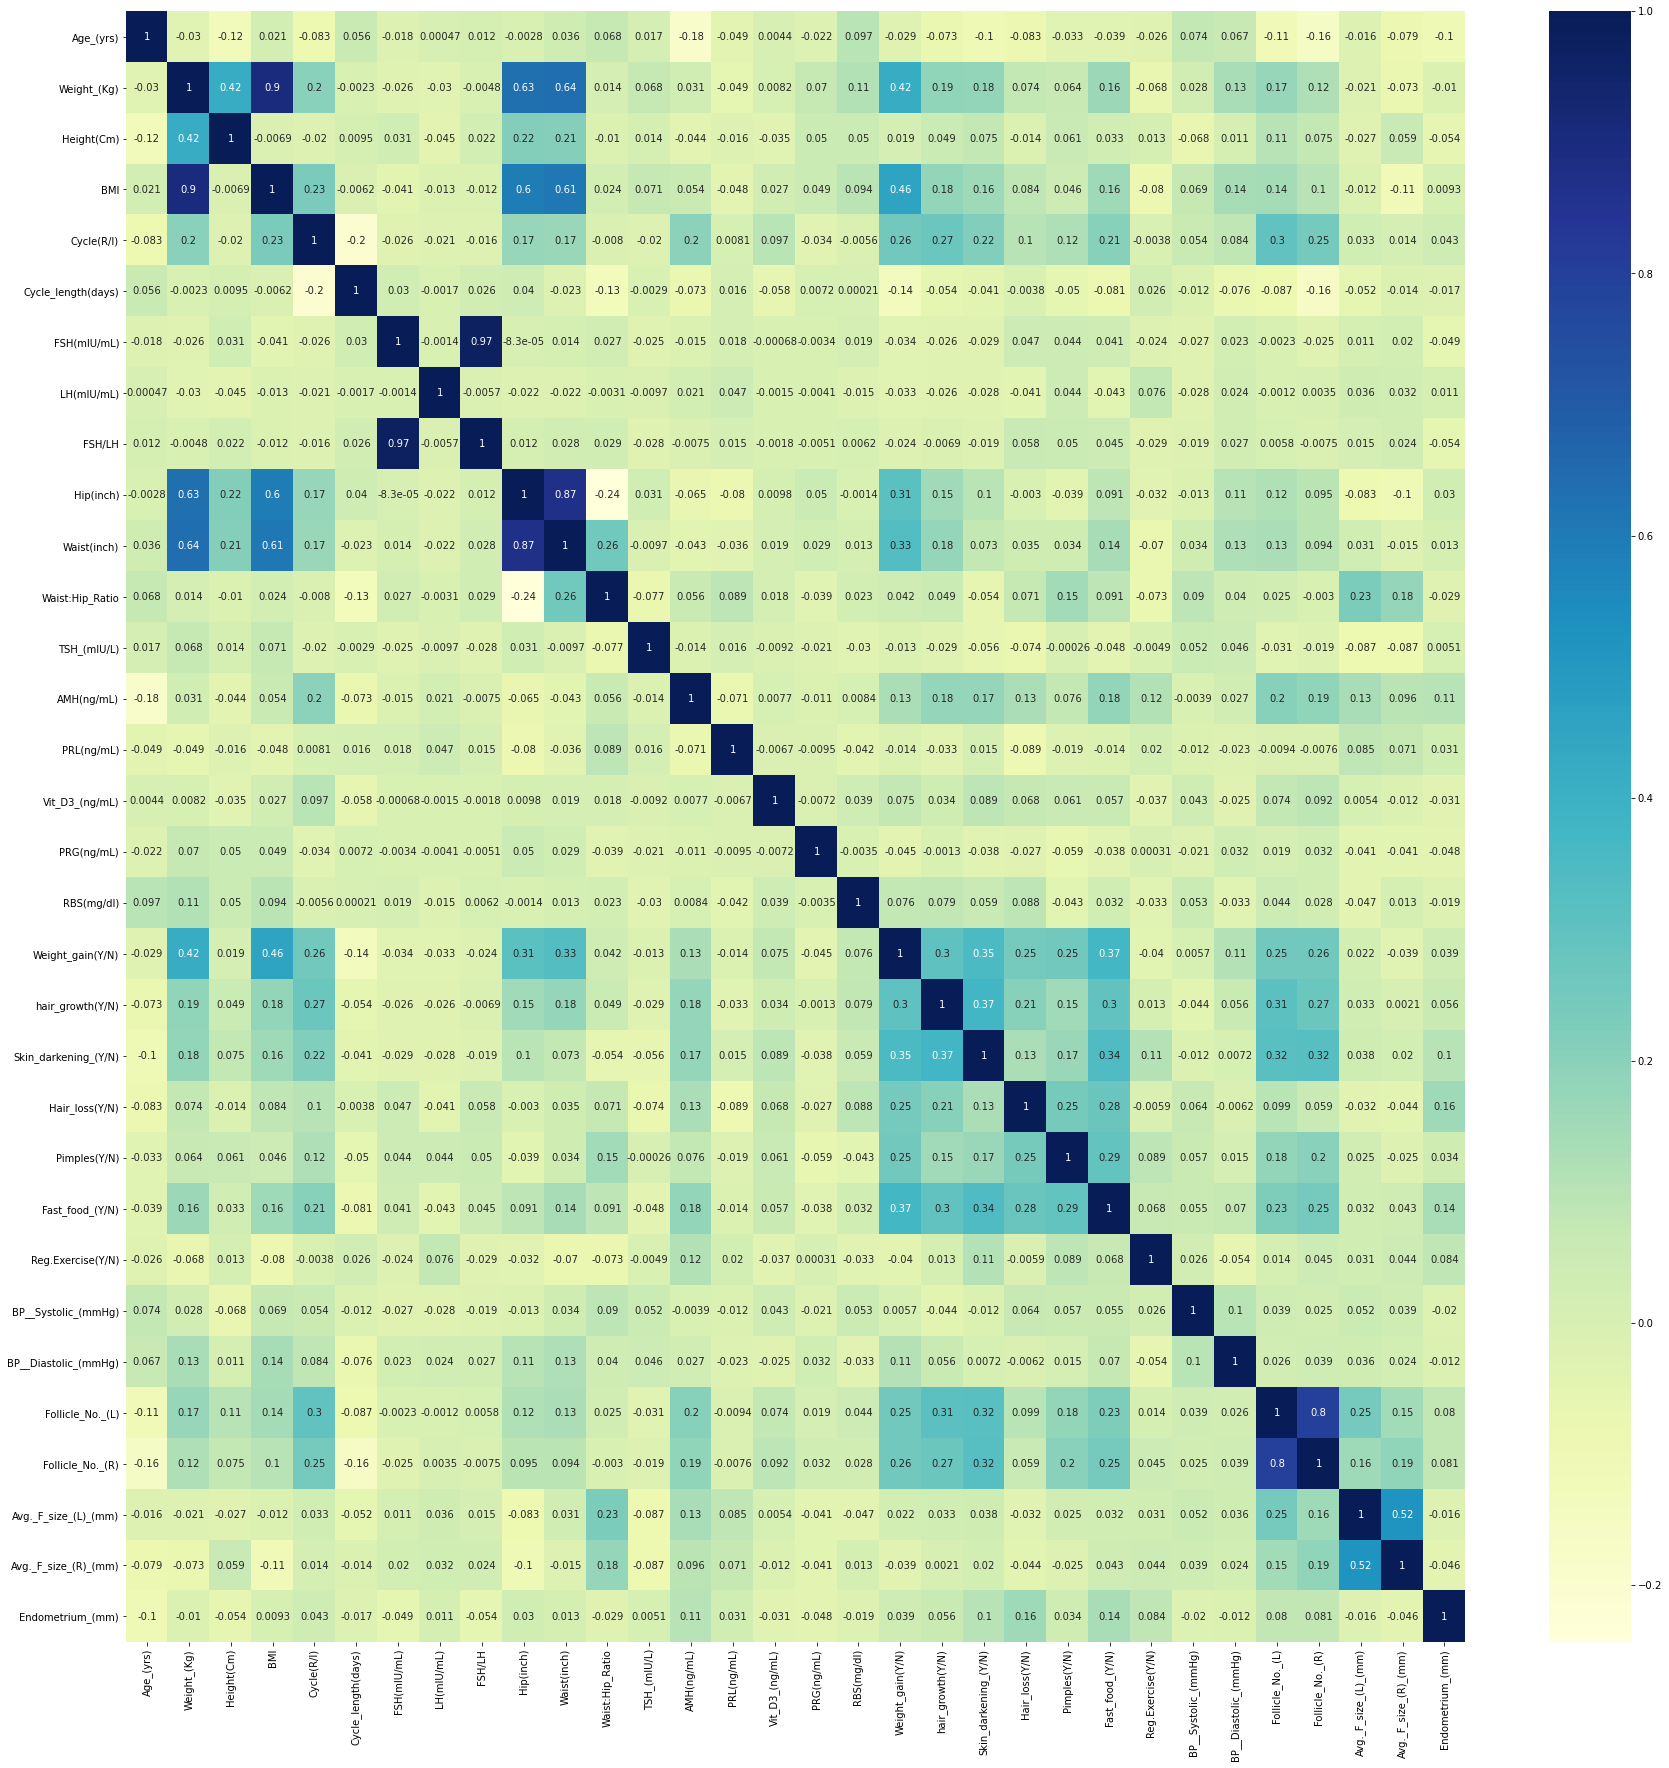

In [30]:
plt.figure(figsize=(30,30))
dataplot = sns.heatmap(X.corr() ,cmap = 'YlGnBu', annot=True)
plt.show()

In [31]:
corr_matrix = df.corr()
corr_matrix['PCOS_(Y/N)'].sort_values()

Cycle_length(days)     -0.178480
Age_(yrs)              -0.168513
PRG(ng/mL)             -0.043834
FSH(mIU/mL)            -0.030319
FSH/LH                 -0.018336
TSH_(mIU/L)            -0.010140
PRL(ng/mL)              0.005143
BP__Systolic_(mmHg)     0.007942
Waist:Hip_Ratio         0.012386
BP__Diastolic_(mmHg)    0.038032
RBS(mg/dl)              0.048922
LH(mIU/mL)              0.063879
Reg.Exercise(Y/N)       0.065337
Height(Cm)              0.068254
Vit_D3_(ng/mL)          0.085494
Avg._F_size_(R)_(mm)    0.097690
Endometrium_(mm)        0.106648
Avg._F_size_(L)_(mm)    0.132992
Hip(inch)               0.162297
Waist(inch)             0.164598
Hair_loss(Y/N)          0.172879
BMI                     0.199534
Weight_(Kg)             0.211938
AMH(ng/mL)              0.264361
Pimples(Y/N)            0.286077
Fast_food_(Y/N)         0.376183
Cycle(R/I)              0.400475
Weight_gain(Y/N)        0.441047
hair_growth(Y/N)        0.464667
Skin_darkening_(Y/N)    0.475733
Follicle_N

In [32]:
X = X.drop(['Height(Cm)','Weight_(Kg)','Hip(inch)','Waist(inch)','Waist:Hip_Ratio','BP__Diastolic_(mmHg)' ,'BP__Systolic_(mmHg)' ], axis=1)

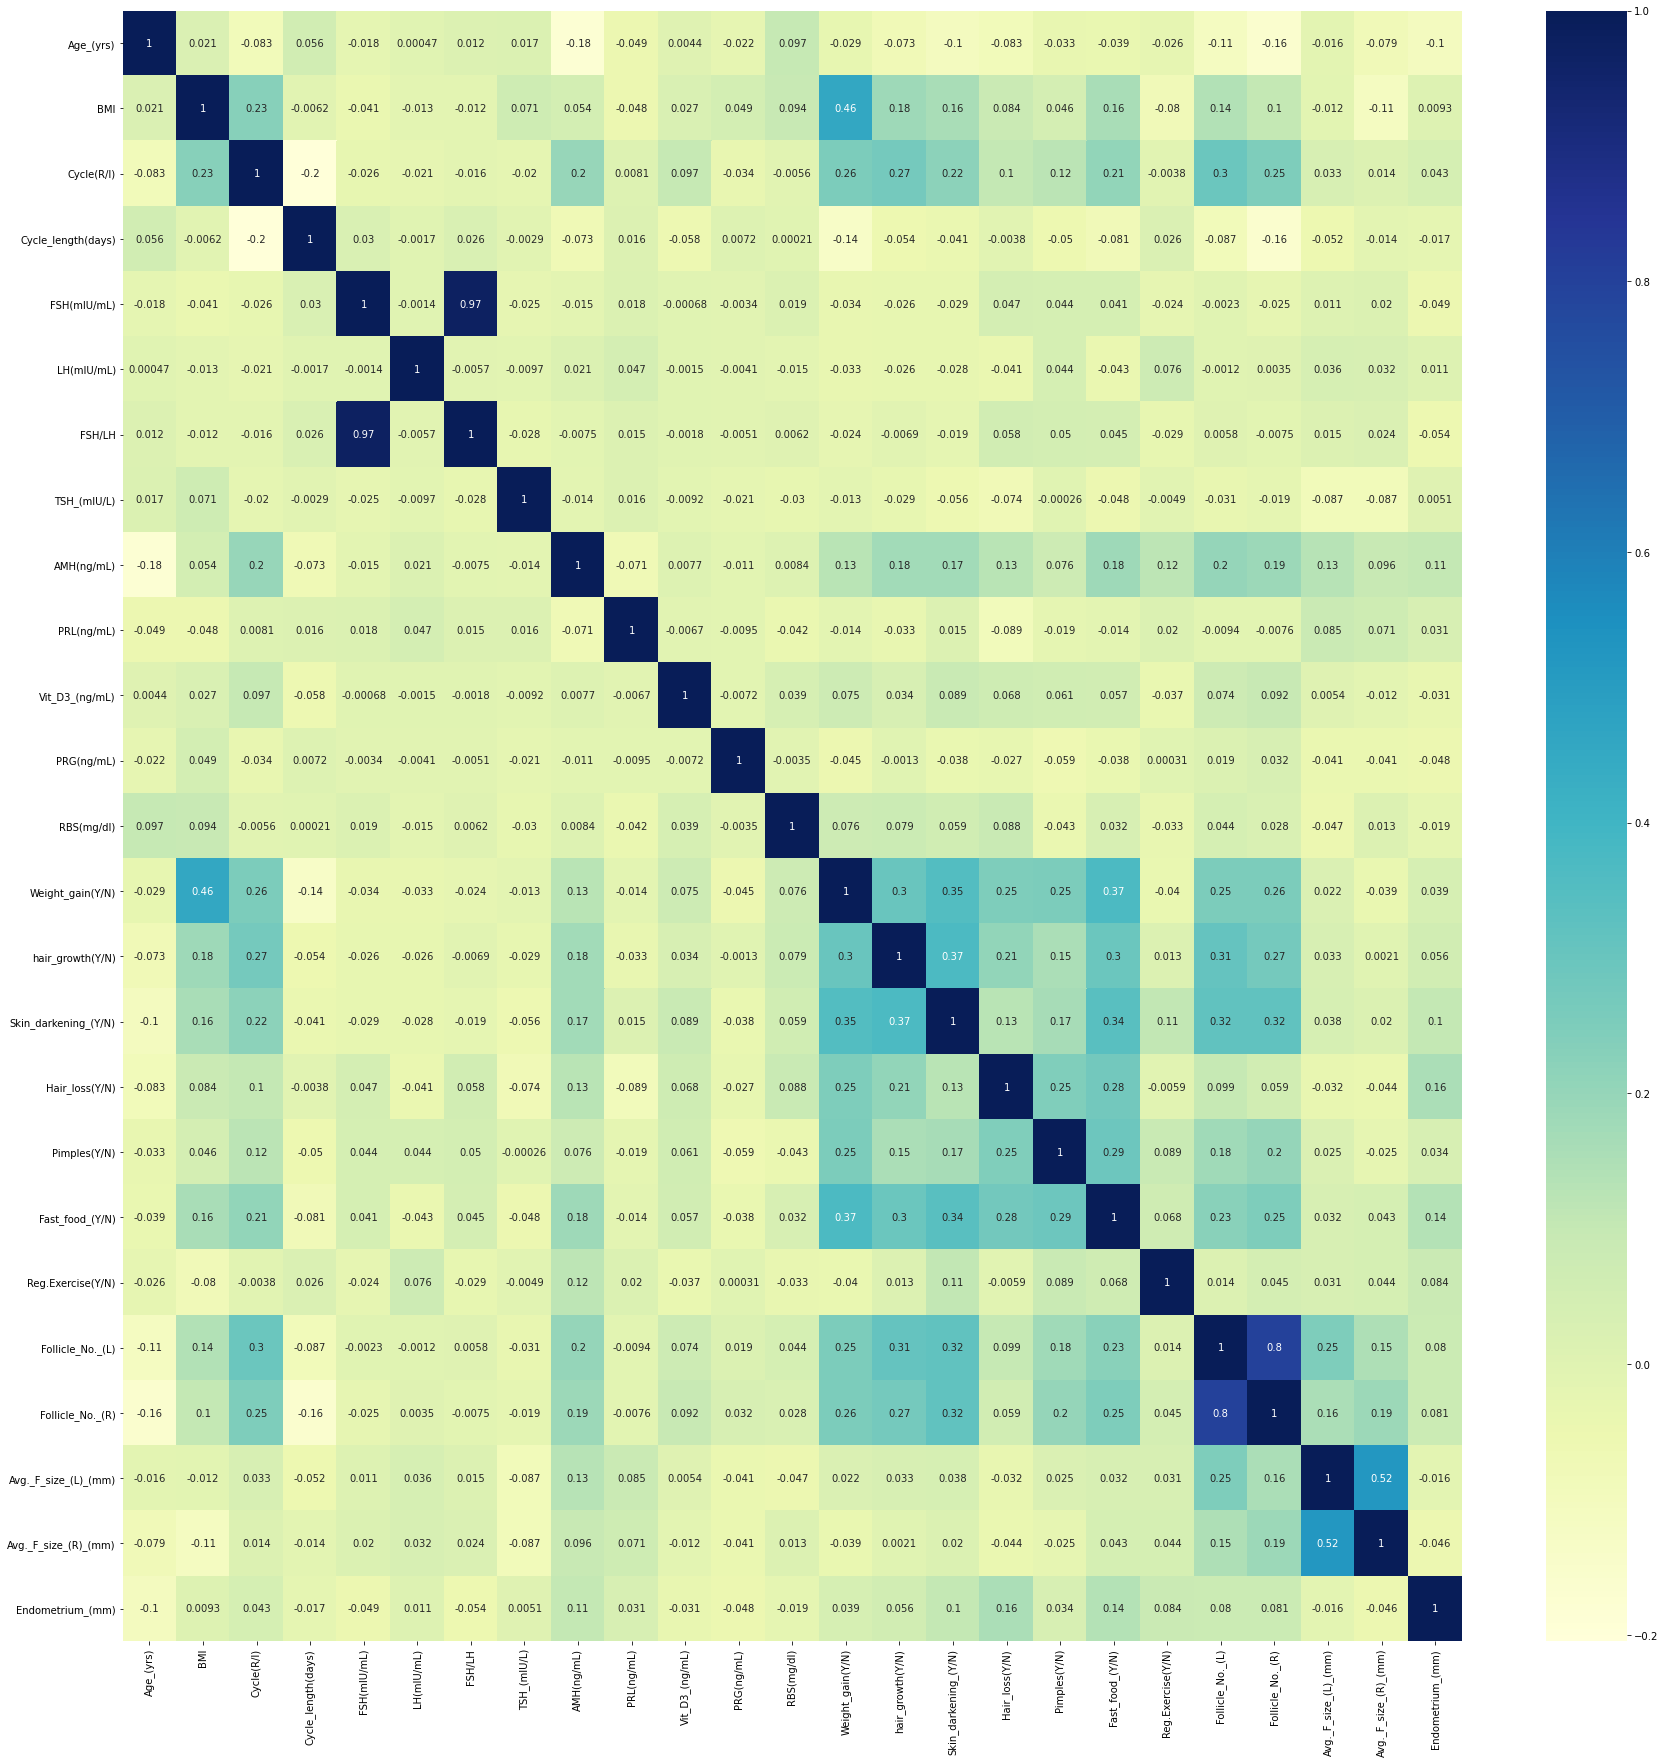

In [33]:
plt.figure(figsize=(30,30))
dataplot = sns.heatmap(X.corr() ,cmap = 'YlGnBu', annot=True)
plt.show()

In [34]:
X = X.drop(['Follicle_No._(R)','Avg._F_size_(R)_(mm)','FSH/LH','Vit_D3_(ng/mL)'], axis=1)

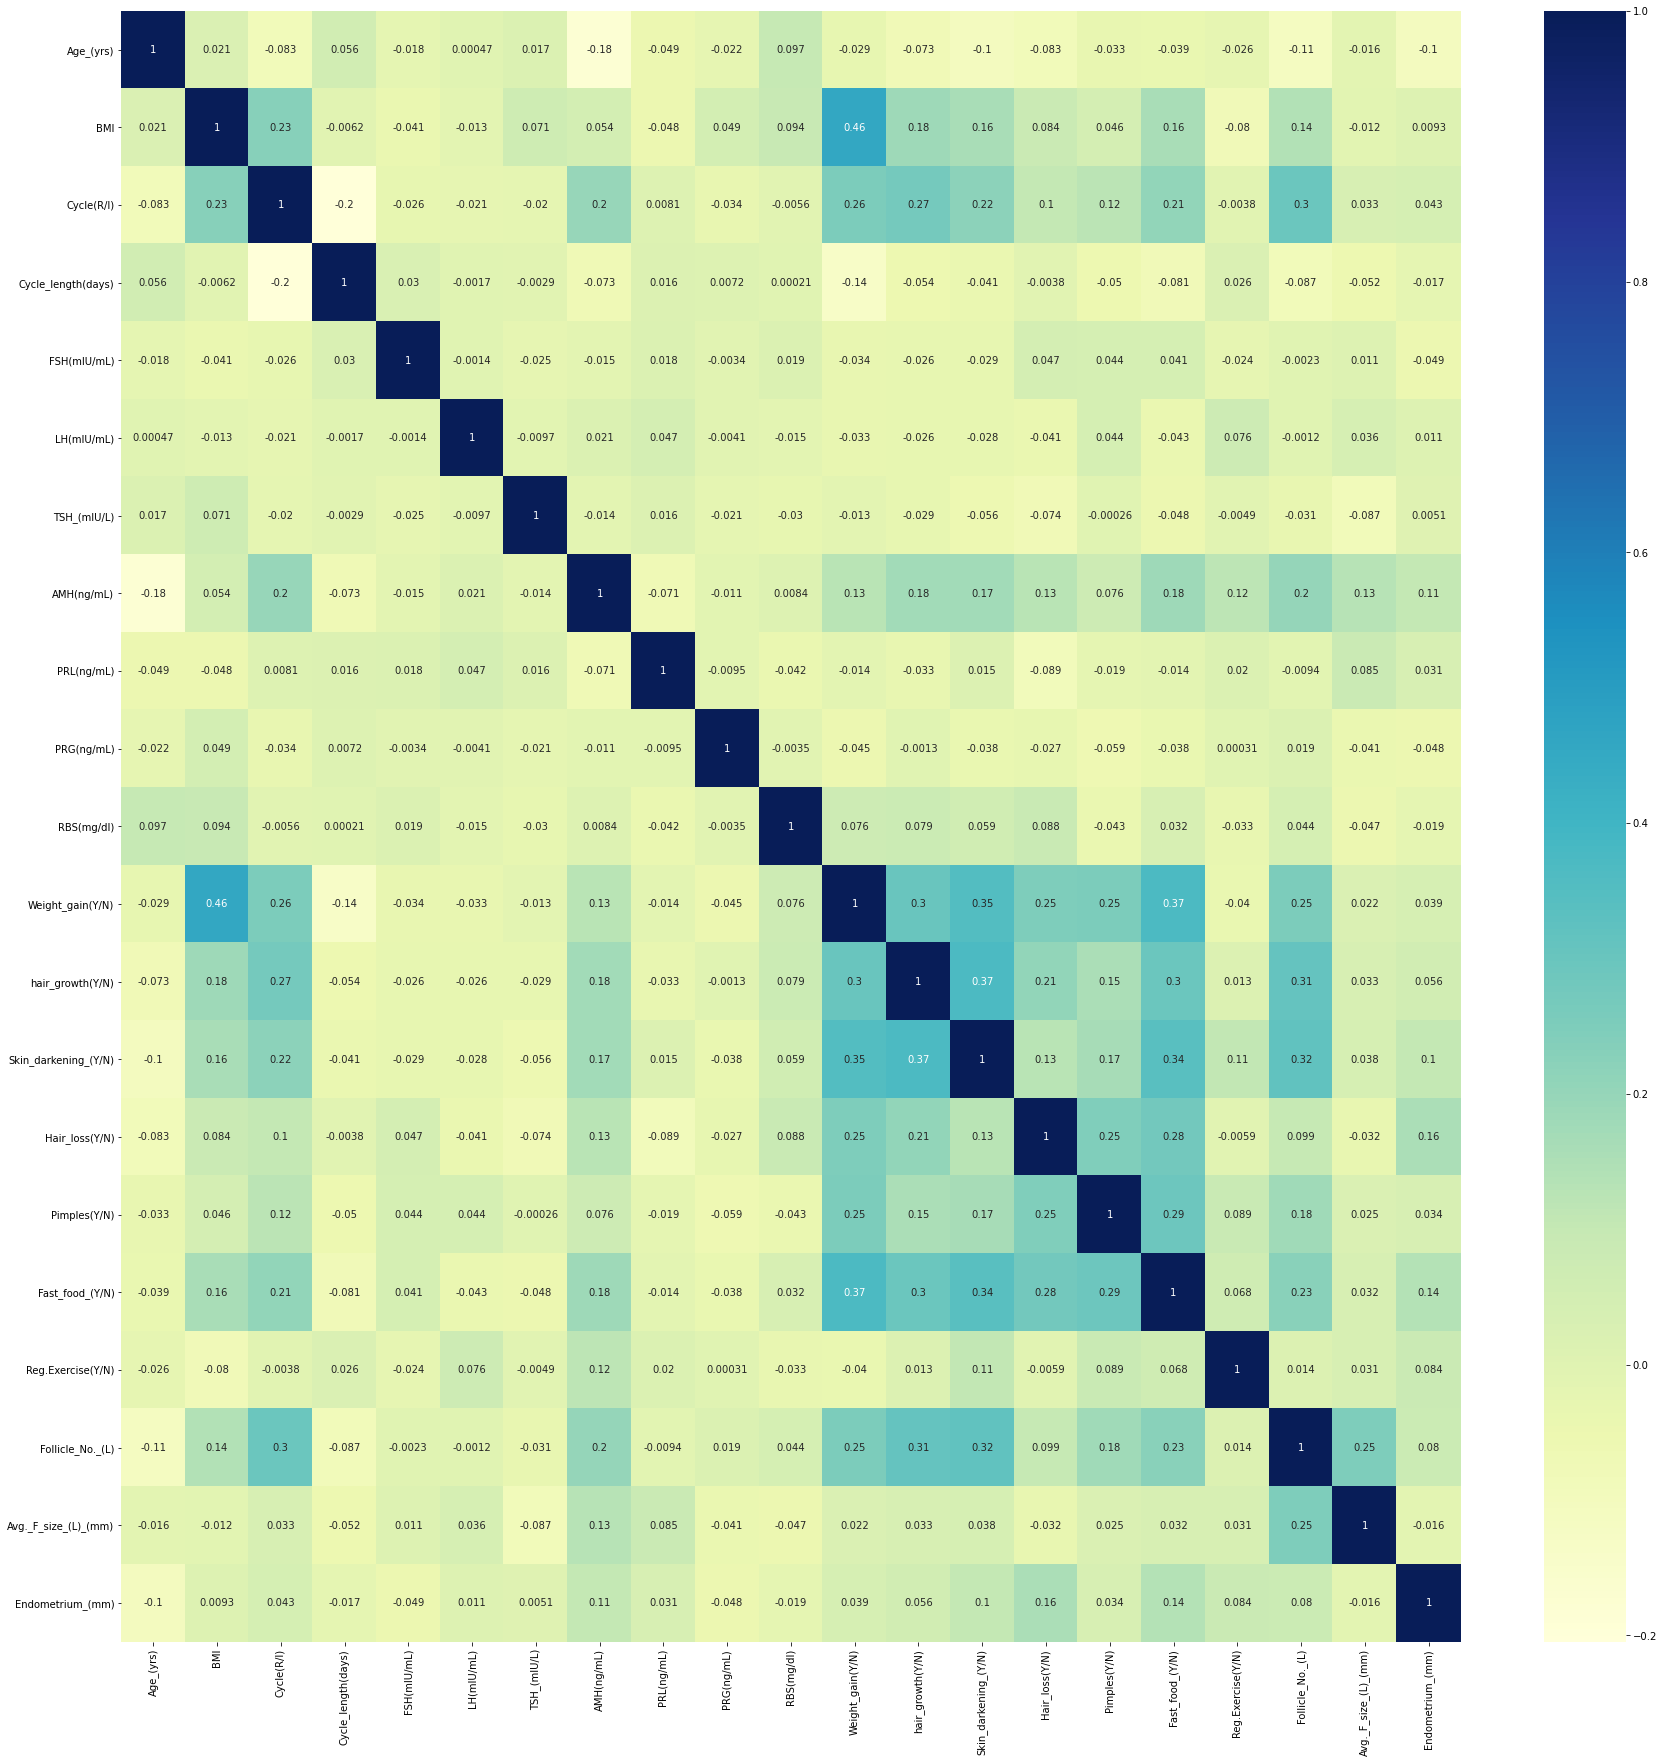

In [35]:
plt.figure(figsize=(30,30))
dataplot = sns.heatmap(X.corr() ,cmap = 'YlGnBu', annot=True)
plt.show()

In [36]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


features  vif_Factor
0              Age_(yrs)   29.941609
1                    BMI   41.005226
2             Cycle(R/I)   10.994247
3     Cycle_length(days)   11.896664
4            FSH(mIU/mL)    1.022318
5             LH(mIU/mL)    1.023343
6            TSH_(mIU/L)    1.672768
7             AMH(ng/mL)    2.215105
8             PRL(ng/mL)    3.704876
9             PRG(ng/mL)    1.046159
10            RBS(mg/dl)   26.703852
11      Weight_gain(Y/N)    2.565296
12      hair_growth(Y/N)    1.823716
13  Skin_darkening_(Y/N)    2.000357
14        Hair_loss(Y/N)    2.227654
15          Pimples(Y/N)    2.315765
16       Fast_food_(Y/N)    2.852389
17     Reg.Exercise(Y/N)    1.408252
18      Follicle_No._(L)    4.193446
19  Avg._F_size_(L)_(mm)   18.256764
20      Endometrium_(mm)   15.369446

In [38]:
from sklearn.model_selection import train_test_split
#split data into dependent variables(X) and independent variable(y) that we would predict
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)


train size X :  (432, 21)
train size y :  (432,)
test size X :  (109, 21)
test size y :  (109,)


In [39]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


In [40]:
#check for distribution of labels
y_train.value_counts(normalize=True)


0    0.664352
1    0.335648
Name: PCOS_(Y/N), dtype: float64

In [41]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
lr_basemodel =LogisticRegression(class_weight={0:0.34,1:0.66})
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,y_train)


LogisticRegression(class_weight={0: 0.34, 1: 0.66})

In [43]:
from sklearn.metrics import f1_score
y_pred_basemodel = lr_basemodel.predict(X_test)
print("f1 score for base model is : " , f1_score(y_test,y_pred_basemodel))


f1 score for base model is :  0.7741935483870969
